# Analysis 1:
    Display the Full Details of all E-mail in allen-p file

In [116]:
import re
import os
import string

In [117]:
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem.lancaster import LancasterStemmer
from collections import Counter


In [118]:
# To extract five data: email from, enail to, subject, email text, sent date
def read_email(path):
    from_list = []
    to_list = []
    subject_list = []
    date_list = []
    text_list = []

    #  To extract data
# x=[['From','To','Subject','Date']]
    
    for file in os.listdir(path):
        with open(os.path.join(path, file), 'r',encoding='utf-8') as content_file:
            content = content_file.read()
            
            from_list.append(re.findall('[\n\r].*From: \s*([^\n\r]*)', content)[0])    # Appending all from details to From_list
            # To
            to_list.append(re.findall('[\n\r].*To: \s*([^\n\r]*)', content)[0])
            # Subject
            subject = re.findall('Subject: (?s)(.*)Mime-Version', content)[0]
            subject = subject.replace('\n', '')
            subject_list.append(subject)
            # Date
            date_list.append(re.findall('[\n\r].*Date: \s*([^\n\r]*)', content)[0])
            # Email text
            text_original = re.findall("(?<=X-FileName:)[.|\n|\W|\w]*", content)[0]
            text = text_original.replace('\n', '')
            text = text.replace('pallen (Non-Privileged).pst', '')
            text = text.replace('pallen.nsf', '')
            text_list.append(text)
            tmp = {''}

    email_data = {}
    email_data['From'] = from_list
    email_data['To'] = to_list
    email_data['Subject'] = subject_list
    email_data['Date'] = date_list
    email_data['Text'] = text_list
   
    return email_data


df_allenp = read_email('midterm/data/enron/enron_mail_20150507/maildir/allen-p/_sent_mail')






In [121]:

x=[['From','To','Subject','Date','Text']]

from_lis = df_allenp['From']
to_lis = df_allenp['To']
subject_lis = df_allenp['Subject']
date_lis = df_allenp['Date']
text_lis = df_allenp['Text']
for i in range(len(from_lis)):
    tmp = [from_lis[i], to_lis[i], subject_lis[i], date_lis[i], text_lis[i]]
    x.append(tmp)

out = open('out.csv', 'w')
for row in x:
    #print (row)
    for column in row:
        out.write('%s,' % column)
    out.write('\n')
out.close()

In [120]:
#print (type(df_allenp))
from_lis = df_allenp['From']
to_lis = df_allenp['To']
subject_lis = df_allenp['Subject']
date_lis = df_allenp['Date']
text_lis = df_allenp['Text']
for i in range(len(from_lis)):     # First Example
    print  ('From :'+ from_lis[i])
    print   ('To :' +to_lis[i])
    print   ('Subject :' +subject_lis[i])
    print   ('Date :' +date_lis[i])
    print ('Text :' +text_lis[i])
    print('-------------------------------')

From :phillip.allen@enron.com
To :tim.belden@enron.com
Subject :
Date :Mon, 14 May 2001 16:39:00 -0700 (PDT)
Text : Here is our forecast 
-------------------------------
From :phillip.allen@enron.com
To :john.lavorato@enron.com
Subject :Re:
Date :Fri, 4 May 2001 13:51:00 -0700 (PDT)
Text : Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  My suggestion for where to go is Austin.  Play golf a

# Analysis 2
                    Display the Most sent Organization Name


In [106]:
a = []
for each in to_lis:
    x = each.split('@')
    a.append(x[0])
    x= x[1].split('.')[0]
    a.append(x)

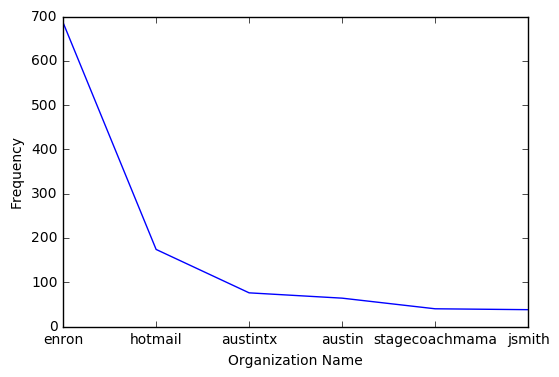

In [112]:
from collections import Counter
import operator
ct = dict(Counter(a))
sorted_x = sorted(ct.items(), key=operator.itemgetter(1), reverse = True)

xnames = []
ypoints = []
x = []
for each in sorted_x[:6]:
    xnames.append(each[0])
    x.append(sorted_x.index(each))
    ypoints.append(each[1])
    

plt.xticks(x, xnames)
plt.plot(x, ypoints)
plt.xlabel('Organization Name')
plt.ylabel('Frequency')
plt.show()

out = open('out2.csv', 'w')
for row in sorted_x:
    for column in row:
        out.write('%s;' % column)
        out.write('\n')
out.close()




In [69]:
sorted_x

[('enron', 343),
 ('hotmail', 87),
 ('stagecoachmama', 40),
 ('jsmith', 38),
 ('austintx', 38),
 ('ina.rangel', 38),
 ('austin', 32),
 ('mike.grigsby', 30),
 ('pallen70', 28),
 ('keith.holst', 28),
 ('cbpres', 22),
 ('john.lavorato', 16),
 ('maryrichards7', 15),
 ('aol', 14),
 ('jacquestc', 14),
 ('matthew.lenhart', 12),
 ('yahoo', 12),
 ('llewter', 11),
 ('jeff.richter', 9),
 ('rlehmann', 8),
 ('natsource', 7),
 ('stouchstone', 7),
 ('keyad', 7),
 ('intelligencepress', 7),
 ('rssmb', 6),
 ('mac.d.hargrove', 6),
 ('tim.belden', 6),
 ('gthorse', 6),
 ('andrea.richards', 6),
 ('al.pollard', 5),
 ('frank.ermis', 5),
 ('tara.sweitzer', 5),
 ('hunter.shively', 4),
 ('frank.hayden', 4),
 ('paula.harris', 4),
 ('tim.heizenrader', 4),
 ('mark', 4),
 ('creativepanel', 4),
 ('bs_stone', 4),
 ('mary.gray', 4),
 ('caprock', 4),
 ('chad.landry', 4),
 ('ray.alvarez', 4),
 ('william.kelly', 4),
 ('gary', 4),
 ('cooper.richey', 4),
 ('dawn.kenne', 4),
 ('colleen.sullivan', 4),
 ('webtv', 3),
 ('thedog

# Analysis 3
          Display the most contact person

In [108]:
names = []
for each in to_lis:
    x = each.split('@')
    names.append(x[0])
    x= x[1].split('.')[0]
    a.append(x)

In [109]:
from collections import Counter
import operator
ctnames = dict(Counter(names))
sortednames_x = sorted(ctnames.items(), key=operator.itemgetter(1), reverse = True)

In [110]:
sortednames_x[0:20]

[('stagecoachmama', 40),
 ('jsmith', 38),
 ('ina.rangel', 38),
 ('mike.grigsby', 30),
 ('keith.holst', 28),
 ('pallen70', 28),
 ('cbpres', 22),
 ('john.lavorato', 16),
 ('maryrichards7', 15),
 ('jacquestc', 14),
 ('matthew.lenhart', 12),
 ('llewter', 11),
 ('jeff.richter', 9),
 ('rlehmann', 8),
 ('stouchstone', 7),
 ('mac.d.hargrove', 6),
 ('gthorse', 6),
 ('tim.belden', 6),
 ('andrea.richards', 6),
 ('al.pollard', 5)]

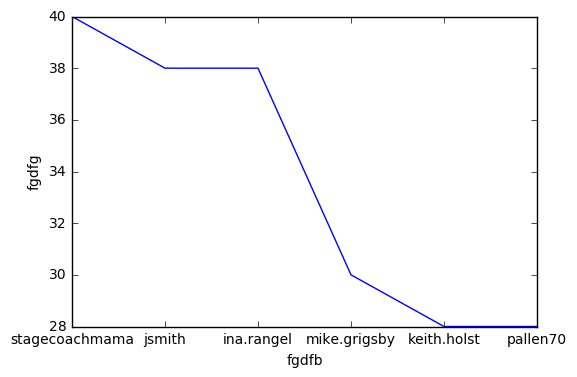

In [111]:
from collections import Counter
import operator
import matplotlib.pyplot as plt

ctnames = dict(Counter(names))
sortednames_x = sorted(ctnames.items(), key=operator.itemgetter(1), reverse = True)

xnames = []
ypoints = []
x = []
for each in sortednames_x[:6]:
    xnames.append(each[0])
    x.append(sortednames_x.index(each))
    ypoints.append(each[1])
    

plt.xticks(x, xnames)
plt.plot(x, ypoints)
plt.xlabel('Contact Name')
plt.ylabel('Frequency')
plt.show()
    
out = open('out3.csv', 'w')
for row in sortednames_x:
    for column in row:
        out.write('%s;' % column)
        out.write('\n')
out.close()